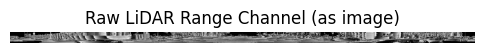

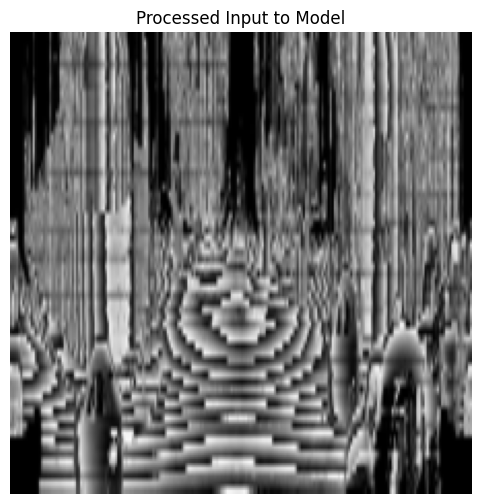

In [1]:
# lidar_visual.ipynb

import pandas as pd
import numpy as np
import ast
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms

# --- Configuration ---
parquet_file = "./lavis/my_datasets/waymo/test/lidar/5638240639308158118_4220_000_4240_000.parquet"

# --- Define visual processor (same as vis_processor) ---
vis_processor = transforms.Compose([
    transforms.Resize((224, 224)),  # match model input size
    transforms.ToTensor(),          # convert to tensor (C x H x W)
    transforms.Normalize(mean=[0.5], std=[0.5])  # optional: normalize range [-1, 1]
])

# --- Load and process LiDAR data ---
try:
    df = pd.read_parquet(parquet_file)
    row = df.iloc[0]

    raw_values = row['[LiDARComponent].range_image_return1.values']
    raw_shape = row['[LiDARComponent].range_image_return1.shape']

    values = np.array(ast.literal_eval(raw_values) if isinstance(raw_values, str) else raw_values)
    shape = ast.literal_eval(raw_shape) if isinstance(raw_shape, str) else raw_shape
    range_image = values.reshape(shape)

    # Select first channel and scale to 8-bit image
    range_channel = (range_image[:, :, 0] * 255).astype(np.uint8)
    bev_image = Image.fromarray(range_channel).convert("RGB")

    # Visualize before processing
    plt.figure(figsize=(6, 6))
    plt.title("Raw LiDAR Range Channel (as image)")
    plt.imshow(bev_image)
    plt.axis("off")
    plt.show()

    # Apply vis_processor
    processed_image = vis_processor(bev_image)

    # Visualize after processing (convert tensor back to image)
    img_np = processed_image.permute(1, 2, 0).numpy()  # (H, W, C)
    img_np = (img_np * 0.5 + 0.5).clip(0, 1)  # denormalize
    plt.figure(figsize=(6, 6))
    plt.title("Processed Input to Model")
    plt.imshow(img_np)
    plt.axis("off")
    plt.show()

except Exception as e:
    print(f"Error processing file: {parquet_file}\n{e}")


In [2]:
import pandas as pd

# --- Load file ---
parquet_file = "./lavis/my_datasets/waymo/test/lidar/5638240639308158118_4220_000_4240_000.parquet"
df = pd.read_parquet(parquet_file)
row = df.iloc[0]

# --- Print all column keys ---
print("All keys in this file:")
for key in row.keys():
    print("-", key)


All keys in this file:
- key.segment_context_name
- key.frame_timestamp_micros
- key.laser_name
- [LiDARComponent].range_image_return1.values
- [LiDARComponent].range_image_return1.shape
- [LiDARComponent].range_image_return2.values
- [LiDARComponent].range_image_return2.shape


In [6]:
print("\nFiltered LiDAR keys:")
for key in row.keys():
    if "LiDARComponent" in key:
        print("-", key)

for key in row.keys():
    if "LiDARComponent" in key:        
        if "LiDARComponent" in key:
            if key == "[LiDARComponent].range_image_return1.shape":
                print("  -", row[key])
            if key == "[LiDARComponent].range_image_return2.shape":
                print("  -", row[key])



Filtered LiDAR keys:
- [LiDARComponent].range_image_return1.values
- [LiDARComponent].range_image_return1.shape
- [LiDARComponent].range_image_return2.values
- [LiDARComponent].range_image_return2.shape
  - [  64 2650    4]
  - [  64 2650    4]


In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# --- Configuration ---
parquet_file = "./lavis/my_datasets/waymo/test/lidar/5638240639308158118_4220_000_4240_000.parquet"

# --- Read LiDAR Data ---
df = pd.read_parquet(parquet_file)
row = df.iloc[0]

# --- Extract values and shape ---
raw_values = row['[LiDARComponent].range_image_return1.values']
raw_shape = row['[LiDARComponent].range_image_return1.shape']

values = np.array(ast.literal_eval(raw_values) if isinstance(raw_values, str) else raw_values)
shape = ast.literal_eval(raw_shape) if isinstance(raw_shape, str) else raw_shape

range_image = values.reshape(shape)  # Likely shape: (H, W, C)
print(f"Range image shape: {range_image.shape}")

# --- Visualize All Channels ---
num_channels = range_image.shape[2]
fig, axs = plt.subplots(1, num_channels, figsize=(5 * num_channels, 5))
for i in range(num_channels):
    axs[i].imshow(range_image[:, :, i], cmap='viridis')
    axs[i].set_title(f'Channel {i}')
    axs[i].axis('off')
plt.suptitle("All LiDAR Channels")
plt.tight_layout()
plt.show()

# --- Plot a composite pseudo-image (range only) ---
range_channel = (range_image[:, :, 0] * 255).astype(np.uint8)
bev_image = Image.fromarray(range_channel).convert("RGB")

plt.figure(figsize=(6, 6))
plt.imshow(bev_image)
plt.title("LiDAR Pseudo-Image (Channel 0 as RGB)")
plt.axis("off")
plt.show()


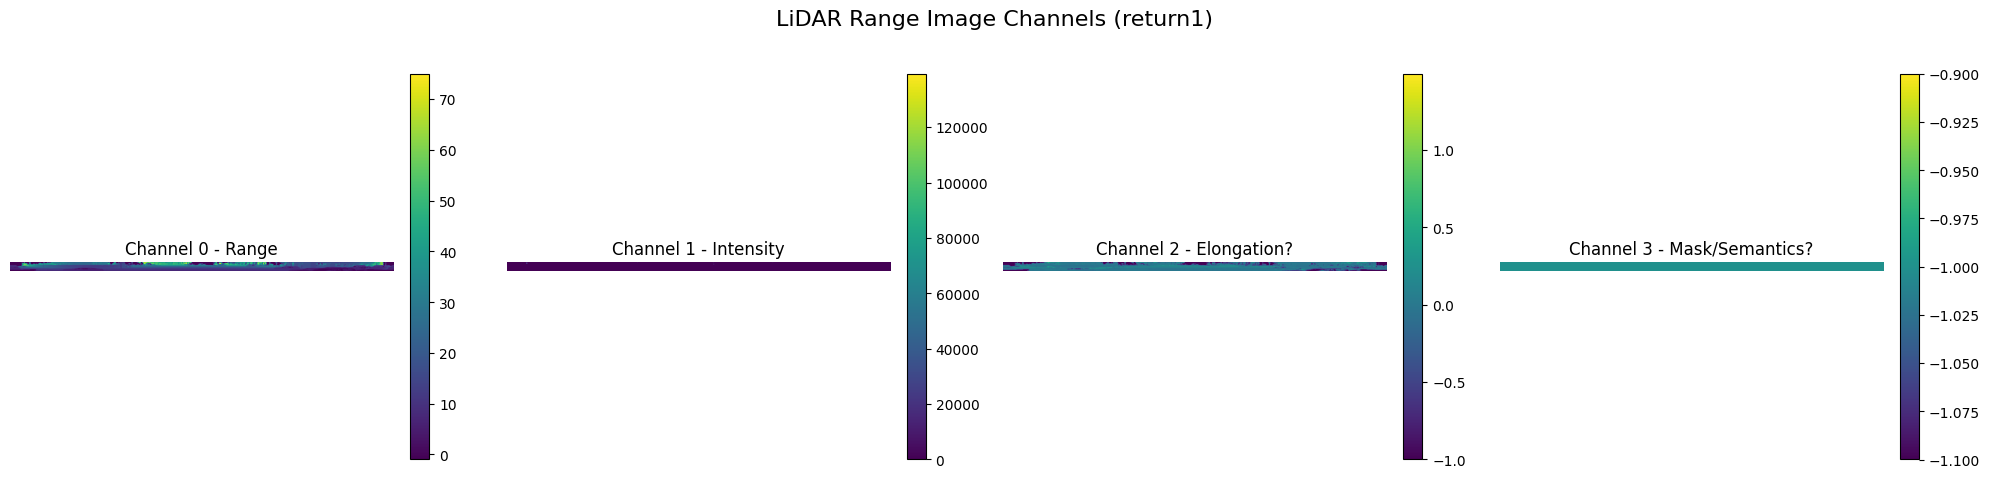

In [10]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

# --- Load file ---
parquet_file = "./lavis/my_datasets/waymo/test/lidar/5638240639308158118_4220_000_4240_000.parquet"
df = pd.read_parquet(parquet_file)
row = df.iloc[0]

# --- Extract range_image_return1 ---
raw_values = row['[LiDARComponent].range_image_return1.values']
raw_shape = row['[LiDARComponent].range_image_return1.shape']

values = np.array(ast.literal_eval(raw_values) if isinstance(raw_values, str) else raw_values)
shape = ast.literal_eval(raw_shape) if isinstance(raw_shape, str) else raw_shape

range_image = values.reshape(shape)  # shape: (64, 2650, 4)
# np.unique(range_image[:, :, 3])
# --- Plot all 4 channels ---
channel_names = ["Range", "Intensity", "Elongation?", "Mask/Semantics?"]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    im = axs[i].imshow(range_image[:, :, i], cmap='viridis')
    # im = axs[i].imshow(range_image[:, :, i], cmap='viridis', aspect='auto')

    axs[i].set_title(f"Channel {i} - {channel_names[i]}")
    axs[i].axis("off")
    fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

plt.suptitle("LiDAR Range Image Channels (return1)", fontsize=16)
plt.tight_layout()
plt.show()





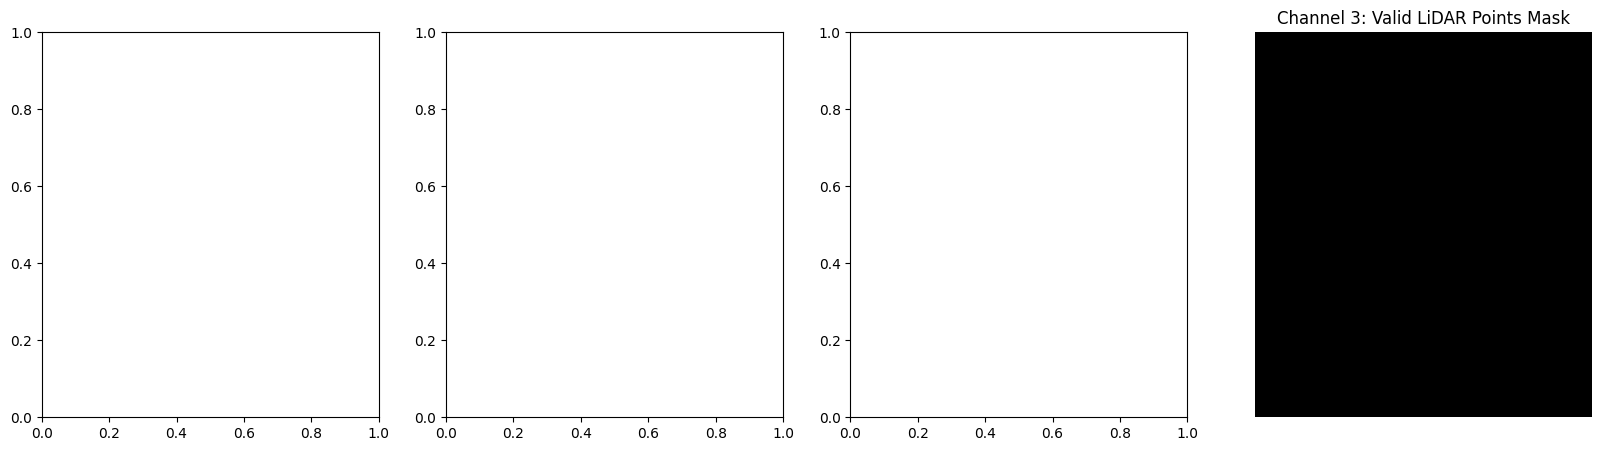

In [19]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

# --- Load file ---
parquet_file = "./lavis/my_datasets/waymo/test/lidar/5638240639308158118_4220_000_4240_000.parquet"
# parquet_file = "./lavis/my_datasets/waymo/train/lidar/2224716024428969146_1420_000_1440_000.parquet"
# parquet_file = "./lavis/my_datasets/waymo/validation/lidar/16979882728032305374_2719_000_2739_000.parquet"
# parquet_file = "./lavis/my_datasets/waymo/validation/lidar/8331804655557290264_4351_740_4371_740.parquet"
df = pd.read_parquet(parquet_file)
row = df.iloc[0]

# --- Extract range_image_return1 ---
raw_values = row['[LiDARComponent].range_image_return1.values']
raw_shape = row['[LiDARComponent].range_image_return1.shape']

values = np.array(ast.literal_eval(raw_values) if isinstance(raw_values, str) else raw_values)
shape = ast.literal_eval(raw_shape) if isinstance(raw_shape, str) else raw_shape

range_image = values.reshape(shape)  # shape: (64, 2650, 4)
# dd = np.unique(range_image[:, :, 3])
# print(dd)
# --- Plot all 4 channels ---
channel_names = ["Range", "Intensity", "Elongation?", "Mask/Semantics?"]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# for i in range(4):
#     # im = axs[i].imshow(range_image[:, :, i], cmap='viridis')
#     im = axs[i].imshow(range_image[:, :, i], cmap='viridis', aspect='auto')

#     axs[i].set_title(f"Channel {i} - {channel_names[i]}")
#     axs[i].axis("off")
#     fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

# plt.suptitle("LiDAR Range Image Channels (return1)", fontsize=16)
# plt.tight_layout()
# plt.show()



plt.imshow(range_image[:, :, 3] == 1, cmap='gray', aspect='auto')
plt.title("Channel 3: Valid LiDAR Points Mask")
plt.axis('off')
plt.show()




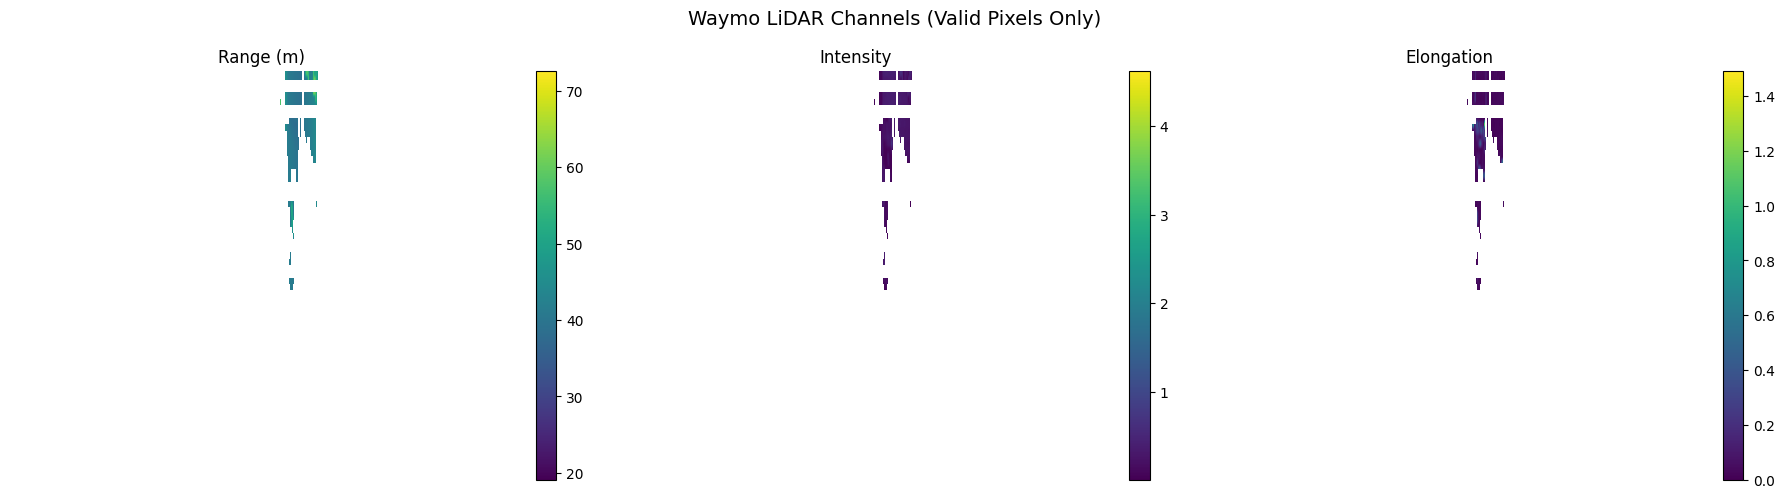

In [22]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

# --- Config ---
parquet_file = "./lavis/my_datasets/waymo/train/lidar/2224716024428969146_1420_000_1440_000.parquet"

# --- Load Waymo .parquet file ---
df = pd.read_parquet(parquet_file)
row = df.iloc[0]

# --- Extract and reshape range image ---
def extract_range_image(row, key_prefix):
    raw_values = row[f'{key_prefix}.values']
    raw_shape = row[f'{key_prefix}.shape']
    values = np.array(ast.literal_eval(raw_values) if isinstance(raw_values, str) else raw_values)
    shape = ast.literal_eval(raw_shape) if isinstance(raw_shape, str) else raw_shape
    return values.reshape(shape)

range_image = extract_range_image(row, '[LiDARComponent].range_image_return1')  # shape: (64, 2650, 4)

# --- Extract channels ---
range_data = range_image[:, :, 0]
intensity = range_image[:, :, 1]
elongation = range_image[:, :, 2]
mask = range_image[:, :, 3] == 1.0  # True = valid

# --- Apply mask: invalid points → NaN ---
range_masked = np.where(mask, range_data, np.nan)
intensity_masked = np.where(mask, intensity, np.nan)
elongation_masked = np.where(mask, elongation, np.nan)

# --- Plot the 3 valid channels ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Range (m)', 'Intensity', 'Elongation']
data_list = [range_masked, intensity_masked, elongation_masked]

for i in range(3):
    im = axs[i].imshow(data_list[i], cmap='viridis', aspect='auto')
    axs[i].set_title(titles[i])
    axs[i].axis('off')
    fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

plt.suptitle("Waymo LiDAR Channels (Valid Pixels Only)", fontsize=14)
plt.tight_layout()
plt.show()
